In [2]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt

References: 

Mao <i>et al.</i>: [https://arxiv.org/abs/2201.12753](https://arxiv.org/abs/2201.12753)<p>
Cao, Renou <i>et al.</i>: [https://arxiv.org/abs/2201.12754](https://arxiv.org/abs/2201.12754)

Mao <i>et al.</i> give a general inequality of the form

$$\langle\hat{S}_{N}\rangle \equiv \langle \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} + \hat{C}_{0}\hat{D}_{0}+ \cdots + \hat{V}_{0}\hat{W}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}\cdots\hat{W}_{1}\rangle \leq 2(N-1)$$

QM predicts $\langle \hat{S}_{N}\rangle = 2(N-2)+2\sqrt{2}$

The slightly different convention is that $\hat{B}_{1}$ has an overall minus sign in its defintion compared to the previous cases.

$$\hat{B}_{0} = \frac{1}{\sqrt{2}}\left(\hat{\sigma}^{z}+\hat{\sigma}^{x}\right)$$
$$\hat{B}_{1} = \frac{1}{\sqrt{2}}\left(\hat{\sigma}^{z}-\hat{\sigma}^{x}\right)$$

All other observers have operators
$$\hat{A}_{0}=\hat{C}_{0}=\cdots=\hat{W}_{0} = \hat{\sigma}^{z}$$
$$\hat{A}_{1}=\hat{C}_{1}=\cdots=\hat{W}_{1} = \hat{\sigma}^{x}$$
Note that the combinations needed are

$$\hat{B}_{+}=\hat{B}_{0}+\hat{B}_{1}=\sqrt{2}\hat{\sigma}^{z}$$
$$\hat{B}_{-}=\hat{B}_{0}-\hat{B}_{1}=\sqrt{2}\hat{\sigma}^{z}$$

QM predicts $\langle\hat{S}_{N}\rangle = 2(N-2)+2\sqrt{2}$. Explicit forms for $N=3,4,5,6$ are

$$\hat{S}_{3} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}$$
$$\hat{S}_{4} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{0}$$
$$\hat{S}_{5} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}+\hat{D}_{0}\hat{E}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{0}\hat{E}_{0}$$
$$\hat{S}_{6} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}+\hat{D}_{0}\hat{E}_{0}+\hat{E}_{0}\hat{F}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{0}\hat{E}_{0}\hat{F}_{0}$$


$N=3$
$$\hat{S}_{3} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}$$
$$\hat{S}_{3} = \sqrt{2}\hat{Z}\hat{Z}\hat{I} + 2\hat{Z}\hat{I}\hat{Z} + \sqrt{2}\hat{X}\hat{X}\hat{X}$$

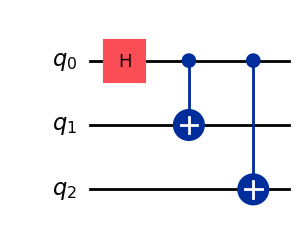

In [3]:
from qiskit.quantum_info import SparsePauliOp

S3 = SparsePauliOp.from_list([("ZZI", np.sqrt(2)), ("ZIZ", 2.), ("XXX", np.sqrt(2))])

qr = QuantumRegister(3,'q')
ghz3circ = QuantumCircuit(qr)

#GHZ3
ghz3circ.h(0)
ghz3circ.cx(0,1)
ghz3circ.cx(0,2)
ghz3circ.draw('mpl')

In [4]:
estimator = StatevectorEstimator()

pub = (
    ghz3circ,  # circuit
    [[S3]],  # Observables
)

job_result = estimator.run(pubs=[pub]).result()

s3_est = job_result[0].data.evs[0]

print(s3_est)
print(2.*(3.-2)+2.*np.sqrt(2.))

[4.82842712]
4.82842712474619


$N=4$ 

$$\hat{S}_{4} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}$$

$$\hat{S}_{4} = \sqrt{2}\hat{Z}\hat{Z}\hat{I}\hat{I} +2\hat{Z}\hat{I}\hat{Z}\hat{I} + +2\hat{I}\hat{I}\hat{Z}\hat{Z}+\sqrt{2}\hat{X}\hat{X}\hat{X}\hat{X}$$

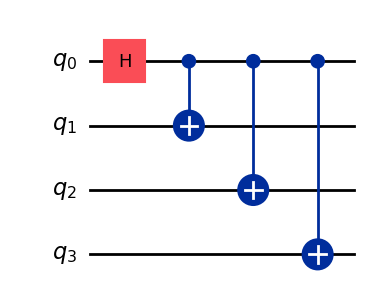

In [5]:
S4 = SparsePauliOp.from_list([("ZZII", np.sqrt(2)), ("ZIZI", 2.), ("IIZZ", 2.), ("XXXX", np.sqrt(2))])

qr = QuantumRegister(4,'q')
ghz4circ = QuantumCircuit(qr)

#GHZ4
ghz4circ.h(0)
ghz4circ.cx(0,1)
ghz4circ.cx(0,2)
ghz4circ.cx(0,3)

ghz4circ.draw('mpl')

In [6]:
from qiskit.primitives import StatevectorEstimator

estimator = StatevectorEstimator()

pub = (
    ghz4circ,  # circuit
    [[S4]],  # Observables
)

job_result = estimator.run(pubs=[pub]).result()

s4_est = job_result[0].data.evs[0]

print(s4_est)
print(2.*(4.-2)+2.*np.sqrt(2.))

[6.82842712]
6.82842712474619


$N=5$ 

$$\hat{S}_{5} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0} + \hat{D}_{0}\hat{E}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}\hat{E}_{1}$$

$$\hat{S}_{5} = \sqrt{2}\hat{Z}\hat{Z}\hat{I}\hat{I}\hat{I} +2\hat{Z}\hat{I}\hat{Z}\hat{I}\hat{I} +2\hat{I}\hat{I}\hat{Z}\hat{Z}\hat{I}+2\hat{I}\hat{I}\hat{I}\hat{Z}\hat{Z}+\sqrt{2}\hat{X}\hat{X}\hat{X}\hat{X}\hat{X}$$

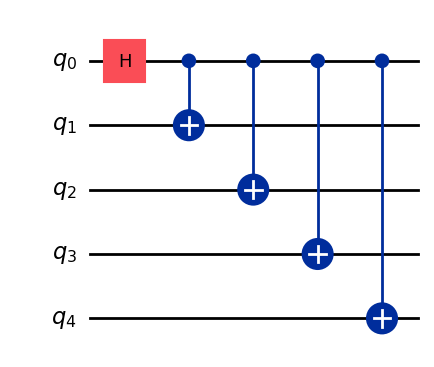

In [7]:
S5 = SparsePauliOp.from_list([("ZZIII", np.sqrt(2)), ("ZIZII", 2.), ("IIZZI", 2.), ("IIIZZ", 2.), ("XXXXX", np.sqrt(2))])

qr = QuantumRegister(5,'q')
ghz5circ = QuantumCircuit(qr)

#GHZ4
ghz5circ.h(0)
ghz5circ.cx(0,1)
ghz5circ.cx(0,2)
ghz5circ.cx(0,3)
ghz5circ.cx(0,4)

ghz5circ.draw('mpl')

In [8]:
estimator = StatevectorEstimator()

pub = (
    ghz5circ,  # circuit
    [[S5]],  # Observables
)

job_result = estimator.run(pubs=[pub]).result()

s5_est = job_result[0].data.evs[0]

print(s5_est)
print(2.*(5.-2)+2.*np.sqrt(2.))

[8.82842712]
8.82842712474619


$N=6$ 

$$\hat{S}_{6} = \hat{A}_{0}(\hat{B}_{0}+\hat{B}_{1}) + 2(\hat{A}_{0}\hat{C}_{0} +\hat{C}_{0}\hat{D}_{0} + \hat{D}_{0}\hat{E}_{0}+\hat{E}_{0}\hat{F}_{0}) + \hat{A}_{1}(\hat{B}_{0}-\hat{B}_{1})\hat{C}_{1}\hat{D}_{1}\hat{E}_{1}\hat{F}_{1}$$

$$\hat{S}_{6} = \sqrt{2}\hat{Z}\hat{Z}\hat{I}\hat{I}\hat{I}\hat{I} +2\hat{Z}\hat{I}\hat{Z}\hat{I}\hat{I}\hat{I} +2\hat{I}\hat{I}\hat{Z}\hat{Z}\hat{I}\hat{I}+2\hat{I}\hat{I}\hat{I}\hat{Z}\hat{Z}\hat{I}+2\hat{I}\hat{I}\hat{I}\hat{I}\hat{Z}\hat{Z}+\sqrt{2}\hat{X}\hat{X}\hat{X}\hat{X}\hat{X}$$

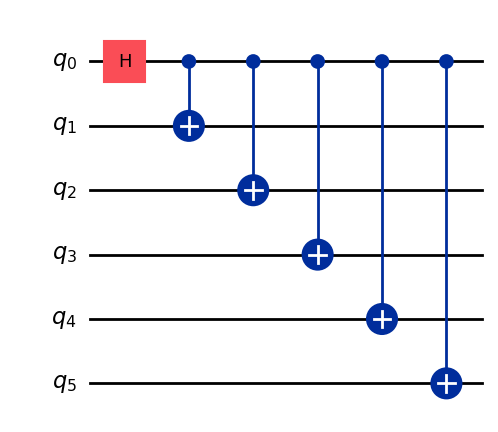

In [9]:
S6 = SparsePauliOp.from_list([("ZZIIII", np.sqrt(2)), ("ZIZIII", 2.), ("IIZZII", 2.), ("IIIZZI", 2.), ("IIIIZZ", 2.), ("XXXXXX", np.sqrt(2))])

qr = QuantumRegister(6,'q')
ghz6circ = QuantumCircuit(qr)

#GHZ6
ghz6circ.h(0)
ghz6circ.cx(0,1)
ghz6circ.cx(0,2)
ghz6circ.cx(0,3)
ghz6circ.cx(0,4)
ghz6circ.cx(0,5)

ghz6circ.draw('mpl')

In [10]:
estimator = StatevectorEstimator()

pub = (
    ghz6circ,  # circuit
    [[S6]],  # Observables
)

job_result = estimator.run(pubs=[pub]).result()

s6_est = job_result[0].data.evs[0]

print(s6_est)
print(2.*(6.-2)+2.*np.sqrt(2.))

[10.82842712]
10.82842712474619


## Version information:

In [11]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.25.0'

In [12]:
import qiskit 

qiskit.version.get_version_info()

'1.1.1'